**Tuberculosis Dataset prediction**

**AIM**

predict tuberculosis (TB) incidence rates by categorizing them into Low, Medium, and High categories based on various features like HIV prevalence, mortality rate, GDP per capita, etc.

**Introduction**

Tuberculosis (TB) remains a major global health concern, particularly in low- and middle-income countries. Predicting TB incidence rates can help healthcare authorities allocate resources effectively and implement targeted interventions.

This project applies machine learning techniques to analyze a dataset containing various socio-economic and health-related factors that influence TB incidence. The goal is to categorize TB incidence rates into Low, Medium, and High categories using models such as Random Forest, Gradient Boosting, and Support Vector Machine (SVM).

The project involves:

1. **Data preprocessing** (handling missing values, encoding categorical variables, and scaling features)
2. **Exploratory Data Analysis** (EDA) (visualizing feature distributions and correlations)
3. **Machine learning model training** (hyperparameter tuning and evaluation using accuracy, classification reports, and confusion matrices)
4. **Model deployment** (saving the best-performing model for future use)
Through this predictive modeling approach, the project aims to provide insights into the key factors affecting TB incidence and contribute to better public health strategies.

**Data preprocessing**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification

**Load the dataset**

In [7]:
df = pd.read_csv('Tuberculosis_Dataset.csv')

**Exploratory Data Analysis**

**Display basic information**

In [10]:
display(df.head())

,Country,Year,TB_Incidence_Rate,Population,HIV_Prevalence,Treatment_Success_Rate,Mortality_Rate,Urban_Population_Percentage,Smoking_Rate,Alcohol_Consumption,...,Age_Group,Gender,HIV_CoInfection_Rate,BCG_Vaccination_Coverage,Multidrug_Resistance_Rate,Unemployment_Rate,GDP_Per_Capita,Life_Expectancy,TB_Screening_Coverage,Rural_Population_Percentage
0,Country_52,2003,56.145286,788566,15.124856,63.008939,18.417301,39.939777,38.323440,13.115522,...,25-54,Female,4.491676,87.163577,1.405499,27.964788,98235.258489,41.642988,53.486072,89.256182
1,Country_15,2021,137.470346,1282706,1.365238,63.861596,25.804928,78.360506,48.317584,13.676533,...,0-14,Female,0.527789,61.848695,4.022342,29.374837,35130.172901,63.968269,76.473413,42.549955
2,Country_61,2014,179.814220,1100374,13.770958,92.017009,15.319141,27.609710,9.085422,3.070677,...,65+,Female,0.977231,63.133755,14.618375,23.704493,24703.776975,81.883098,59.468310,29.938714
3,Country_21,2014,124.211205,1141641,8.198825,94.747900,9.405584,73.239525,39.927303,7.360397,...,65+,Male,3.218930,55.069057,5.758827,21.854778,16417.483760,64.295034,96.677854,32.578901
4,Country_24,2011,50.394259,759040,4.472235,83.710431,37.830973,11.821832,48.280581,4.958237,...,55-64,Female,1.938210,70.991237,0.201211,23.512661,60373.614322,52.874425,88.048894,17.109448


In [11]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Country                            400000 non-null  object 
 1   Year                               400000 non-null  int64  
 2   TB_Incidence_Rate                  400000 non-null  float64
 3   Population                         400000 non-null  int64  
 4   HIV_Prevalence                     400000 non-null  float64
 5   Treatment_Success_Rate             400000 non-null  float64
 6   Mortality_Rate                     400000 non-null  float64
 7   Urban_Population_Percentage        400000 non-null  float64
 8   Smoking_Rate                       400000 non-null  float64
 9   Alcohol_Consumption                400000 non-null  float64
 10  Healthcare_Expenditure_Per_Capita  400000 non-null  float64
 11  Primary_Healthcare_Access          4000

None

In [12]:
display(df.describe())

,Year,TB_Incidence_Rate,Population,HIV_Prevalence,Treatment_Success_Rate,Mortality_Rate,Urban_Population_Percentage,Smoking_Rate,Alcohol_Consumption,Healthcare_Expenditure_Per_Capita,Primary_Healthcare_Access,HIV_CoInfection_Rate,BCG_Vaccination_Coverage,Multidrug_Resistance_Rate,Unemployment_Rate,GDP_Per_Capita,Life_Expectancy,TB_Screening_Coverage,Rural_Population_Percentage
count,400000.000000,400000.000000,4.000000e+05,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000
mean,2010.990065,150.014989,1.004924e+06,9.987637,80.001831,20.085060,50.014973,27.489608,7.503156,2549.638128,74.970397,2.503065,74.467146,10.000538,14.996877,50247.132967,62.490105,75.023549,50.042036
std,6.634506,50.071879,4.890291e+05,5.770656,11.545157,9.788165,23.094261,12.982729,4.331976,1413.705625,14.428868,1.444628,14.147889,5.776092,8.657267,28734.261350,12.983382,14.425025,23.129090
min,2000.000000,0.000000,1.000000e+04,0.000102,60.000060,0.000000,10.000096,5.000037,0.000009,100.005685,50.000039,0.000004,50.000017,0.000025,0.000030,500.091179,40.000021,50.000096,10.000071
25%,2005.000000,116.229449,6.639138e+05,4.992294,70.010921,13.274535,30.025613,16.234412,3.745456,1325.504801,62.493094,1.248151,62.228727,4.999050,7.516825,25330.501497,51.248472,62.551530,29.959686
50%,2011.000000,149.991955,1.000864e+06,9.982016,80.005942,20.007293,50.022259,27.487870,7.508720,2550.100164,74.945254,2.508932,74.449666,9.994811,14.982496,50275.196503,62.495050,75.038854,50.095765
75%,2017.000000,183.687594,1.335413e+06,14.975149,89.995049,26.722454,70.042623,38.734104,11.256136,3769.384740,87.458181,3.753471,86.736067,15.015379,22.485968,75147.950770,73.735315,87.535695,70.037772
max,2022.000000,383.098928,3.244383e+06,19.999983,99.999936,65.704344,89.999993,49.999926,14.999990,4999.987162,99.999985,4.999995,98.999963,19.999962,29.999910,99999.868251,84.999987,99.999475,89.999963


**Data Preprocessing**

**Handling missing values**

In [15]:
df.dropna(inplace=True)

**Encoding categorical variables**

In [17]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

**Define Target Variable**

In [19]:
target_column = 'TB_Incidence_Rate'

**Ensure target column is numeric**

In [21]:
if target_column in df.select_dtypes(include=['number']).columns:
    df['TB_Category'] = pd.qcut(df[target_column], q=3, labels=['Low', 'Medium', 'High'])
else:
    raise ValueError(f"Target column {target_column} must be numeric.")

In [22]:
target_column = 'TB_Incidence_Rate'

**Ensure target column is numeric**

In [24]:
if target_column in df.select_dtypes(include=['number']).columns:
    df['TB_Category'] = pd.qcut(df[target_column], q=3, labels=['Low', 'Medium', 'High'])
else:
    raise ValueError(f"Target column {target_column} must be numeric.")

**Feature Selection and Splitting Data**

In [26]:
X = df.drop(columns=[target_column, 'TB_Category'])
y = df['TB_Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Feature Scaling**

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Data Visualization**

**Distribution of Target Variable**

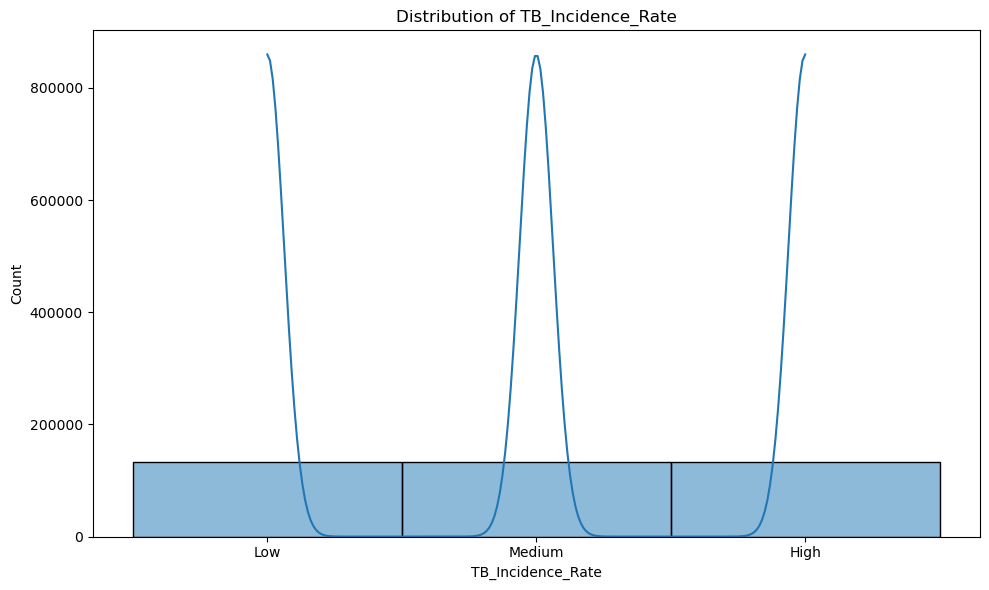

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title(f'Distribution of {target_column}')
plt.xlabel(target_column)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Feature Correlation Heatmap**

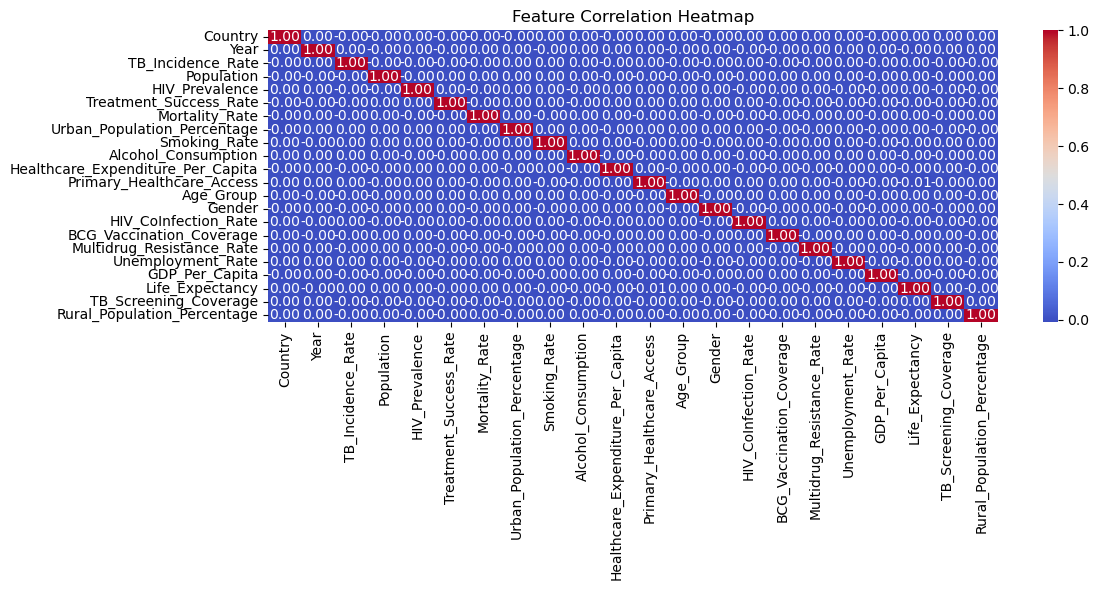

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

**Pairplot of Selected Features**

In [35]:
selected_features = ['TB_Incidence_Rate', 'HIV_Prevalence', 'Mortality_Rate', 'GDP_Per_Capita']

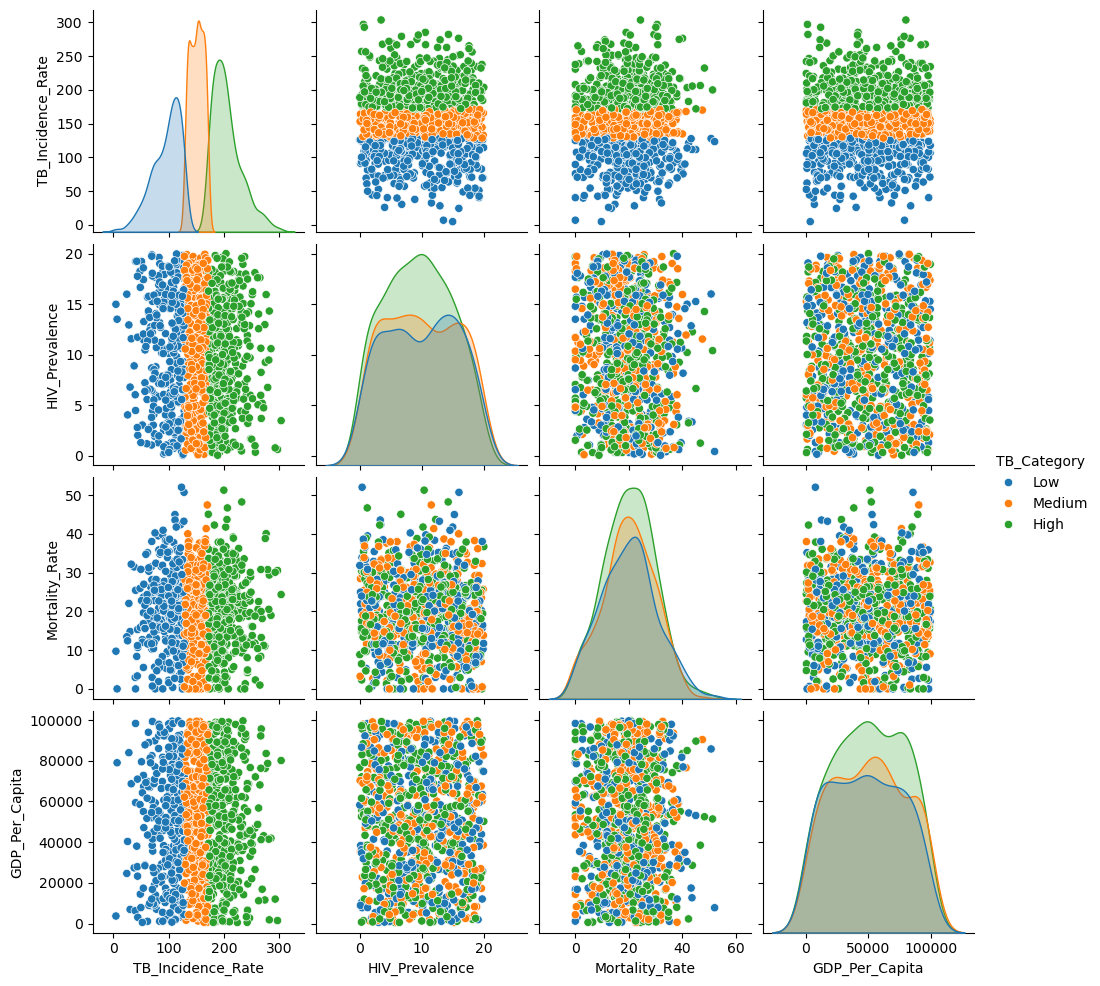

In [36]:
sample_df = df[selected_features + ['TB_Category']].sample(n=1000, random_state=42)
sns.pairplot(sample_df, hue='TB_Category', diag_kind='kde')
plt.show()

**Boxplot for Feature Distributions**

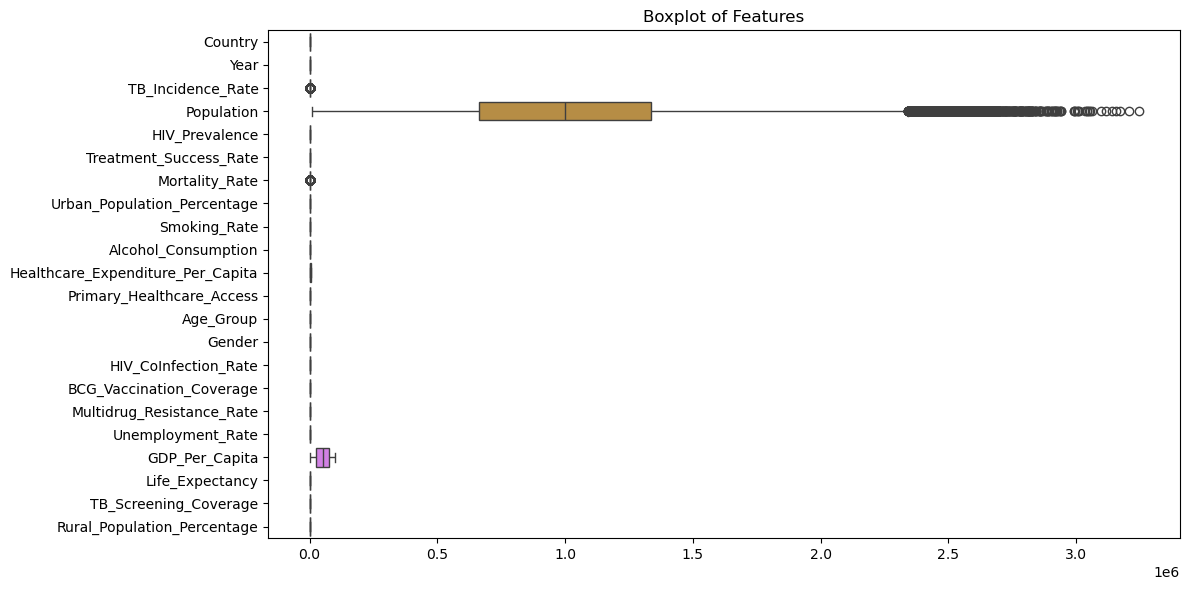

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']), orient='h')
plt.title('Boxplot of Features')
plt.tight_layout()
plt.show()

**Countplot of TB Categories**

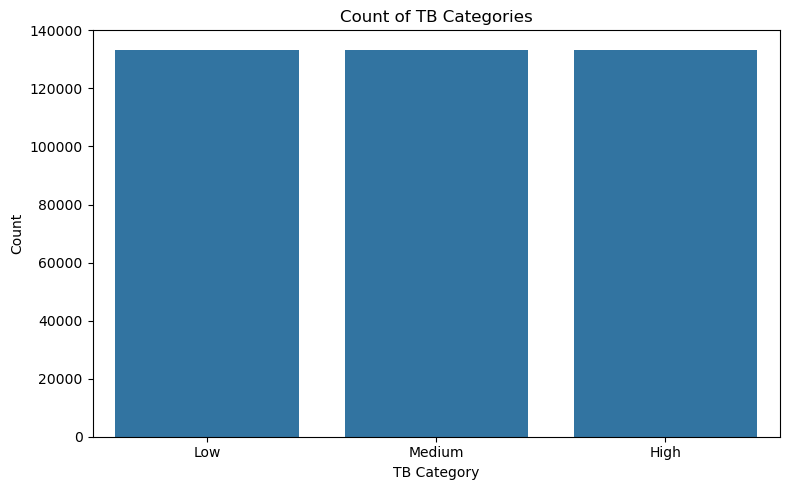

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Count of TB Categories')
plt.xlabel('TB Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Violin Plot for Feature Distributions**

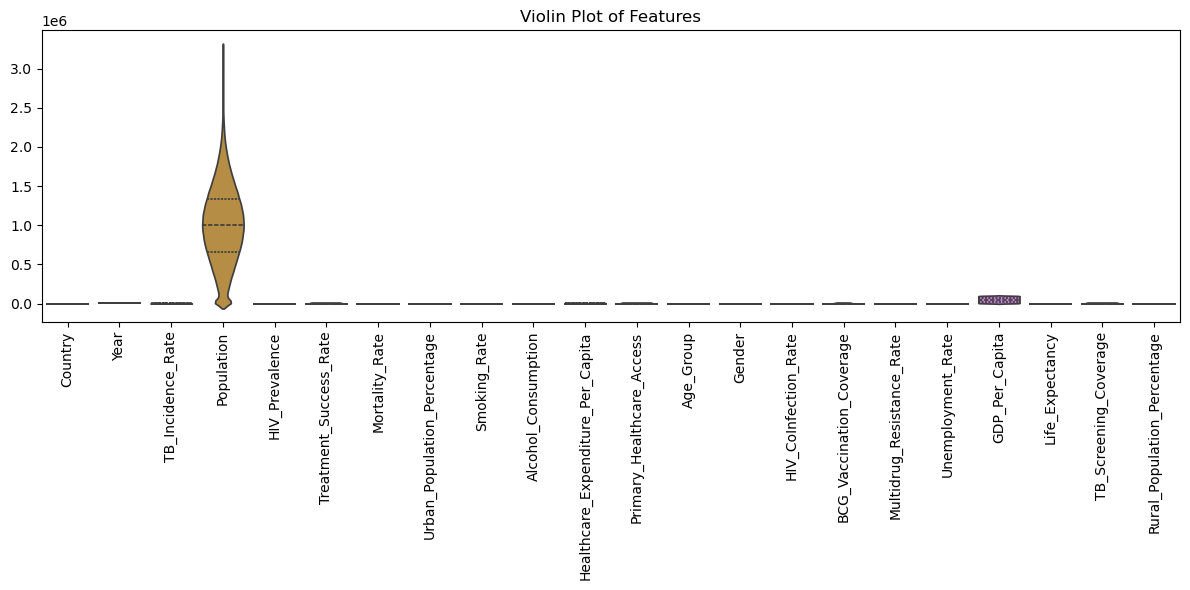

In [42]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df.select_dtypes(include=['number']), inner='quartile')
plt.title('Violin Plot of Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Model Training with Hyperparameter Tuning**

In [44]:
X, y = make_classification(n_samples=200, n_features=10, n_classes=2, 
                           n_informative=5, random_state=42)
print(X.shape, y.shape)

(200, 10) (200,)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

**Hyperparameter Tuning of a Random Forest Classifier using GridSearchCV**

In [48]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [49]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

Get the best model after GridSearchCV,Predict on test set,Calculate accuracy

In [51]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n🎯 Random Forest Accuracy after tuning: {accuracy:.2f}")
print(f"✅ Best Hyperparameters: {grid_search.best_params_}")


🎯 Random Forest Accuracy after tuning: 0.85
✅ Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


Evaluating the Model’s Performance using Classification Report and Confusion Matrix

In [53]:
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🌀 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.83      0.91      0.87        33

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.85        60
weighted avg       0.85      0.85      0.85        60


🌀 Confusion Matrix:
 [[21  6]
 [ 3 30]]


Extracting and Visualizing Feature Importance from the Random Forest Model

In [55]:
feature_importances = pd.Series(best_rf.feature_importances_, index=[f"Feature {i}" for i in range(X.shape[1])])

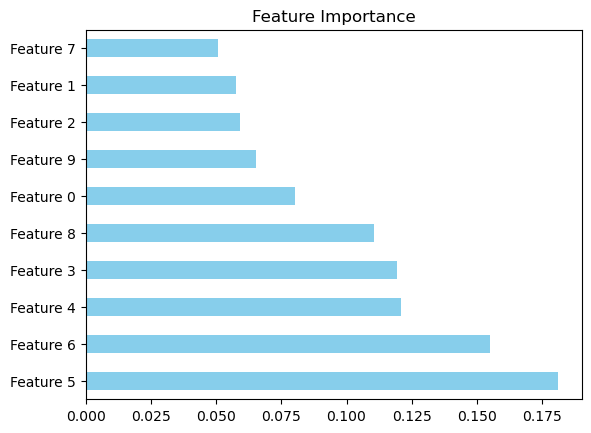

In [56]:
feature_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title('Feature Importance')
plt.show()

In [57]:
joblib.dump(best_rf, 'random_forest_best_model.pkl')
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [58]:
print(f"\n✅ Final Tuned Random Forest Accuracy: {accuracy:.2f}")


✅ Final Tuned Random Forest Accuracy: 0.85
